# Temporal Network Analysis and Visualisation in `pathpy`

**Ingo Scholtes**  
Chair of Machine Learning for Complex Networks  
Center for Artificial Intelligence and Data Science (CAIDAS)  
Julius-Maximilians-Universität Würzburg, DE  


**June 13 2022**

### Introducing the `TemporalNetwork` class

We have considered the `Paths` class, which is useful if you have direct access to path statistics in your time series data. This includes clickstreams of users in information networks, origin-destination statistics in transportation networks, flight ticket sequences, or other **collections of short, ordered sequences**.

In this unit, we expand this view towards temporal networks, i.e. high-resolution time series network data, where edges carry fine-grained time stamps. Considering technical, social, and biological systems that can be modelled as dynamic networks, such data cover a broad class of complex systems that can be studied with higher-order network models.

`pathpy` provides special support for the analysis of temporal networks data via its `TemporalNetwork` class. It is suitable for data that captures time-stamped edges $(v, w, t)$ instantaneously occurring at discrete time stamps $t$. Let us start by creating an empty instance of this class.

<span style="color:red">**TODO:** Import the package `pathpy` and rename it to `pp`. Create a new instance `t` of the class `TemporalNetwork` and print a summary of the instance.</span>

In [1]:
import pathpy as pp

t = pp.TemporalNetwork()
print(t)

Nodes:			0
Time-stamped links:	0
Links/Nodes:		N/A



The `TemporalNetwork` instance `t` stores two key information: a list of nodes `t.nodes` and a collection `t.tedges` of time-stamped edges  $(v, w, t)$. Let us add some time-stamped edges to this instance.

<span style="color:red">**TODO:** Use the `add_edge` function to add six (directed) time-stamped edges $(a,b, 1), (b, a, 3), (b, c, 3), (d, c, 4), (c, d, 5), (c, b, 6)$ and print the result.</span>

In [2]:
t.add_edge('a', 'b', 1)
t.add_edge('b', 'a', 3)
t.add_edge('b', 'c', 3)
t.add_edge('d', 'c', 4)
t.add_edge('c', 'd', 5)
t.add_edge('c', 'b', 6)
print(t)

Nodes:			4
Time-stamped links:	6
Links/Nodes:		1.5
Observation period:	[1, 6]
Observation length:	 5 
Time stamps:		 5 
Avg. inter-event dt:	 1.25
Min/Max inter-event dt:	 1/2


We get basic summary statistics, such as the number of time-stamped interactions, the minimum and maximum timestamp, the duration of the observation, the number of different timestamps, as well as the average, minimum, and maximum time difference between consecutive time-stamped edges.

Above we used integer timestamps, which represent **discrete time units**. But we often have data where time is given in terms of a date and/or time of day. Luckily, `pathpy` supports arbitrary timestamp formats. Let us try this in an example.

<span style="color:red">**TODO:** Create a new `TemporalNetwork` instance `t_realtime` and add three time-stamped edges with string timestamps in the format "YYYY-MM-DD HH:mm:SS". Print the resulting instance and print all time-stamped edges.</span>

In [3]:
t_realtime = pp.TemporalNetwork()
t_realtime.add_edge('a', 'b', '2018-08-22 09:30:22')
t_realtime.add_edge('b', 'c', '2018-08-22 09:30:25')
t_realtime.add_edge('c', 'a', '2018-08-22 10:30:25')
print(t_realtime)

for e in t_realtime.tedges:
    print(e)

Nodes:			3
Time-stamped links:	3
Links/Nodes:		1.0
Observation period:	[1534923022, 1534926625]
Observation length:	 3603 
Time stamps:		 3 
Avg. inter-event dt:	 1801.5
Min/Max inter-event dt:	 3/3600
('a', 'b', 1534923022)
('b', 'c', 1534923025)
('c', 'a', 1534926625)


We observe that `pathpy` internally converts such timestamps into UNIX timestamps. For custom formats, we can set a custom `timestamp_format` parameter that will be used for this conversion. After the conversion, all time units will be in seconds (see e.g. the min/max inter-event time).

Just like other `pathpy` objects, we can directly embed interactive visualisations of a `TemporalNetwork` in-line in `jupyter`. Let us try this with our first example instance `t`.

<span style="color:red">**TODO:** Visualise the `TemporalNetwork` instance `t` by writing the instance variable in an empty `jupyter` cell.</span>

In [4]:
t

Using the default parameters, this visualisation is too fast. Luckily, we can use the generic `pp.visualisation.plot` function to pass a `style` for the visualisation. We can use all parameters that we used for static networks, plus additional parameters that **influence temporal aspects of the visualisation**. 

Of particular importance are the parameters `ms_per_frame` and `ts_per_frame`: The first specifies how many time units will be shown in one frame of the visualisation, allowing us to compress the visualisation by showing multiple timestamps in a single frame. This is helpful when you want to coarse-grain visualisations of high-resolution temporal network data. The parameter `ms_per_frame` defines the target frame rate of the visualisation by adjusting how many milliseconds each frame is displayed. 

Two more parameters will influence the force-directed layout algorithm, that is used to position nodes in the network. In a temporal network, the question is which time-stamped edges should be taken into account for the force-calculation at any given time stamp. If we only consider currently active edges, the layout will change too fast to recognize interesting patterns. If we consider all edges at every time step, node positions will be static despite the dynamics of edges. In real settings we want a compromise between those extremes, i.e. we specify a time window around the current time stamp within which edges are taken into account in the force-directed layout calculation. We can achieve this by setting the number of timestamps to consider before and after the currently shown frame via the `look_ahead` and `look_behind` parameters. 

Finally, we can style active and inactive nodes and edges individually via the parameters `active_edge_width`, `inactive_edge_width`, `active_node_color`, and `inactive_node_color`. This allows us to change the color and/or size of nodes/edges whenever they are involved in an interaction.

<span style="color:red">**TODO:** Create a visualisation where a single timestamp is shown per frame, and each frame is shown for 2 seconds. For the force-directed layout, consider edges active up to two time units before and after the current timestamp. Increase the thickness of currently active egdes. </span>

In [5]:
style = {    
    'ts_per_frame': 1, 
    'ms_per_frame': 2000,
    'look_ahead': 2, 
    'look_behind': 2, 
    'node_size': 15, 
    'inactive_edge_width': 2,
    'active_edge_width': 4, 
    'label_color' : '#ffffff',
    'label_size' : '24px',
    'label_offset': [0,5]
    }
pp.visualisation.plot(t, **style)

Again, this generates an embedded **interactive** visualisation, i.e. you can pan and zoom, or drag nodes. The controls in the top part of the visualisation allow you to stop, start or restart the simulation. 

We can easily save such interactive visualisations as stand-alone HTML5 files, which can be distributed via the Web.

<span style="color:red">**TODO:** Save the visualisation from above to a file and open it in a browser. </span>

In [6]:
pp.visualisation.export_html(t, '../visualisations/4_temporal_network.html', **style)

In [7]:
pp.visualisation.export_tikz(t, '../visualisations/4_temporal_network.tex')

### Calculating path statistics in temporal networks

In the previous session, **we modelled, analysed and visualised path statistics using higher-order network models**. But how can we  apply this higher-order analytics framework to time-stamped network data?

The key idea is that the ordering and timing in which time-stamped edges occur in a `TemporalNetwork` gives rise to so-called **causal or time-respecting paths**. In a nutshell, for two time-stamped edges $(a, b, t)$ and $(b, c, t')$ to contribute to a causal path $a \rightarrow b \rightarrow c$ it must hold that $t < t'$. If we swap timestamps such that the edge $(b, c)$ occurs **before** (a,b), no causal path $a \rightarrow b \rightarrow c$ exists.

So we observe that the chronological order of time-stamped edges crucially influences causal paths, i.e. which nodes can possibly influence each other in time-stamped edge sequences. Moreover, we often want to limit the **maximum time difference between consecutive edges** that contribute to a causal path. For data on dynamic social interactions that spans several years, it does not make sense to consider all chronologically ordered edges as possible causal paths for the propagation of information. After all, humans have limited memory and we should thus consider interactions that occur far apart in time as independent.

We can formally add this condition by setting a maximum time difference $\delta$ for the path calculation. That is, we only consider two edges $(a, b, t)$ and $(b, c, t')$ to contribute to a causal path $a \rightarrow b \rightarrow c$ if $ 0 < t' - t \leq \delta$.

With this definition at hand, and by setting our maximum time difference $\delta$, we can now **calculate causal path statistics in time-stamped network data**. `pathpy` provides powerful algorithms to calculate (or estimate) causal path statistics based on a `TemporalNetwork` instance. Let us try this in our toy example.

 <span style="color:red">**TODO:** Use the method `pp.path_extraction.paths_from_temporal_network_dag` to calculate causal path statistics for the example temporal network `t` and a maximum time difference $\delta=1$. Print the resulting `Paths` object. as well as all causal paths.</span>

In [8]:
causal_paths = pp.path_extraction.temporal_paths.paths_from_temporal_network_dag(t, delta=1)
print(causal_paths)

for l in causal_paths.paths:
    for p in causal_paths.paths[l]:
        if causal_paths.paths[l][p][1]>0:
            print('{0} -> {1}'.format(p, causal_paths.paths[l][p][1]))

2022-06-13 09:03:43 [Severity.INFO]	Constructing time-unfolded DAG ...
2022-06-13 09:03:43 [Severity.INFO]	finished.
Directed Acyclic Graph
Nodes:		10
Roots:		4
Leaves:		5
Links:		6
Acyclic:	None

2022-06-13 09:03:43 [Severity.INFO]	Generating causal trees for 4 root nodes ...
2022-06-13 09:03:43 [Severity.INFO]	finished.
Total path count: 		5.0 
[Unique / Sub paths / Total]: 	[5.0 / 13.0 / 18.0]
Nodes:				4 
Edges:				6
Max. path length:		2
Avg path length:		1.2 
Paths of length k = 0		0.0 [ 0.0 / 11.0 / 11.0 ]
Paths of length k = 1		4.0 [ 4.0 / 2.0 / 6.0 ]
Paths of length k = 2		1.0 [ 1.0 / 0.0 / 1.0 ]

('c', 'b') -> 1.0
('a', 'b') -> 1.0
('b', 'a') -> 1.0
('b', 'c') -> 1.0
('d', 'c', 'd') -> 1.0


For $\delta=1$, it is easy to verify that this output is correct. After all, there is only one pair of (directed) edges $(d, c, 4), (c, d, 5)$ that contributes to a causal path of length two. In addition, we have four time-stamped edges, each of which is a trivial causal path of length one.

This brings us to an important observation: In line with what we have discussed in the previous session, time-aggregated models of temporal networks discard the ordering and timing of links. They are thus **maximum entropy, first-order network models for causal paths** in temporal networks.

While it is easy to understand the path statistics for a maximum time difference of $\delta=1$, already for $\delta=2$ the situation gets more complicated.

<span style="color:red">**TODO:** Generate and print all causal paths emerging for a maximum time difference $\delta=2$.</span>

In [9]:
causal_paths = pp.path_extraction.paths_from_temporal_network_dag(t, delta=2)
print(causal_paths)

for l in causal_paths.paths:
    for p in causal_paths.paths[l]:
        if causal_paths.paths[l][p][1]>0:
            print('{0} -> {1}'.format(p, causal_paths.paths[l][p][1]))

2022-06-13 09:03:48 [Severity.INFO]	Constructing time-unfolded DAG ...
2022-06-13 09:03:48 [Severity.INFO]	finished.
Directed Acyclic Graph
Nodes:		13
Roots:		2
Leaves:		8
Links:		12
Acyclic:	None

2022-06-13 09:03:48 [Severity.INFO]	Generating causal trees for 2 root nodes ...
2022-06-13 09:03:48 [Severity.INFO]	finished.
Total path count: 		4.0 
[Unique / Sub paths / Total]: 	[4.0 / 24.0 / 28.0]
Nodes:				4 
Edges:				6
Max. path length:		3
Avg path length:		2.25 
Paths of length k = 0		0.0 [ 0.0 / 13.0 / 13.0 ]
Paths of length k = 1		0.0 [ 0.0 / 9.0 / 9.0 ]
Paths of length k = 2		3.0 [ 3.0 / 2.0 / 5.0 ]
Paths of length k = 3		1.0 [ 1.0 / 0.0 / 1.0 ]

('a', 'b', 'a') -> 1.0
('d', 'c', 'b') -> 1.0
('d', 'c', 'd') -> 1.0
('a', 'b', 'c', 'd') -> 1.0


We now observe one causal path $a \rightarrow b \rightarrow c \rightarrow d$ of length three, and three additional causal paths of length two. All shorter causal paths are contained in those longer causal paths, as shown by the path statistics shown above.

While I will not go into the full details of `pathpy`'s path calculation algorithm, we can at least peek into how it is done. Internally, `pathpy` generates a so-called **time-unfolded** directed and acyclic graph (see definition and illustration in [this work](https://arxiv.org/abs/1208.0588)). This graph is then the basis to calculate causal path statistics. We can get an idea how this works by manually generating a time-unfolded graph from a temporal network.

<span style="color:red">**TODO:** Use the `pp.DAG.from_temporal_network` method to create a time-unfolded graph from the `TemporalNetwork` `t` for $\delta=2$. Generate a visualisation where you color all time-unfolded nodes according to the "real" node to which they belong and increase the size of root nodes so you can easily tell them apart.</span>

In [10]:
dag, node_map = pp.DAG.from_temporal_network(t, delta=2)

color_map = {'a': 'red',
             'b': 'green',
             'c': 'blue',
             'd': 'red'}

style = { 
    'width': 400, 
    'height': 300, 
    'node_color': { v: color_map[node_map[v]] for v in dag.nodes }, 
    'node_size': { v: 8 if v in dag.roots else 5 for v in dag.nodes }
}

pp.visualisation.plot(dag, **style)

We obtain a time-unfolded graph, where each node is a **temporal copy** of an actual node, and where colors indicate to which node each temporal copy belongs. Importantly, the resulting directed acyclic graph has two root nodes (shown as larger nodes) with degree zero. Each of these root nodes shows where a causal path can possibly start. These roots are the basis for `pathpy`'s path calculation algorithm, i.e. in the simplest case `pathpy` will simply process all of these results to generate the path statistics.

### Higher-order analysis of real dynamic social networks

To simplify the analysis of large collections of time-stamped network data, `pathpy` natively supports `SQLite` databases. For this, let us import `python`'s `sqlite3` module and use the `connect` function to connect to a `SQLite` database file. In order to access columns by name rather than index, we also need to set the default `row_factory` on the `Connection` object that is returned by the `connect` function to `sqlite3.Row`.

<span style="color:red">**TODO:** Import the module `sqlite3` and connect to the `SQLite` database file `temporal_networks.db`, which we provide for you in the `/data` directory. Set the `row_factory` of the resulting connection to `row_factory`.</span>

In [11]:
import sqlite3
con = sqlite3.connect('../data/temporal_networks.db')
con.row_factory = sqlite3.Row

We can now generate temporal networks from an `SQLite` database. For this, we must pass a so-called `SQLite` cursor to the constructor of `TemporalNetwork`. This cursor essentially tells which rows and columns of the database should be used for the temporal network creation. We can create it by passing an `SQL` query to the `execute` function of the `connection` object.

 The `TemporalNetwork` class assumes that the source, target, and timestamp of time-stamped edges are stored in columns called `source`, `target` and `time`. If your database has a different format, you can use the `SQL` `as` keyword to rename the columns in the query. Note that you can use the extension [SQLite](https://marketplace.visualstudio.com/items?itemName=alexcvzz.vscode-sqlite) to browse the `SQLite database` file within Visual Studio Code. Once you have installed it,  hit `CTRL + Shift + P` and enter the command `SQLite: Open Database in Explorer`. This will bring up a new database panel in the explorer section on the left, which you can use to show the structure and contents of the database.
 
Let us now try this with a data set on (undirected) time-stamped proximity contacts between patients and workers in a hospital, collected via the [Sociopatterns](http://www.sociopatterns.com) project.
 
<span style="color:red">**TODO:** Create an undirected `TemporalNetwork` instance `t_ho` from an `SQL` query of the database `sociopatterns_hospital` and print the resulting object.</span>

In [12]:
t_ho = pp.TemporalNetwork.from_sqlite(con.execute('SELECT source, target, time FROM sociopatterns_hospital'),
                                      directed=False)
print(t_ho)

2022-06-13 09:04:12 [Severity.INFO]	Retrieving undirected time-stamped links ...
2022-06-13 09:04:12 [Severity.INFO]	Building index data structures ...
2022-06-13 09:04:12 [Severity.INFO]	Sorting time stamps ...
2022-06-13 09:04:12 [Severity.INFO]	finished.
Nodes:			75
Time-stamped links:	64848
Links/Nodes:		864.64
Observation period:	[140, 347640]
Observation length:	 347500 
Time stamps:		 9453 
Avg. inter-event dt:	 36.76470588235294
Min/Max inter-event dt:	 20/26980


We see that this temporal network has more than 64,000 time-stamped contacts between 75 individuals. On average, each individual engages in more than 860 contacts and the average time difference between contacts is approx. 36 seconds. More interestingly, the minimum inter-event time is 20 seconds, which is due to the fact that the sensor equipment used registered contacts every 20 seconds.

Blindly calculating causal paths for large values of $\delta$ (say $\delta=300$ for a maximum time difference between contacts of five minutes) would lead to the generation of a huge time-unfolded graph. However, since the sampling interval in this data set is larger than the time unit of 1 second, we can use `pathpy`'s time rescaling feature. It helps us to more efficiently calculate causal paths by rescaling internal time units to match a data set's sampling frequency. In the Sociopatterns data, we can rescale time by a factor of 20 without any loss of information. This means that timestamps 20, 40, 80 will be mapped to integer time units 1, 2, 4. Let us try this:

<span style="color:red">**TODO:** Repeat the previous step, but rescale internal time units by a factor of 20. Print the resulting instance `t_ho`</span>

In [13]:
t_ho = pp.TemporalNetwork.from_sqlite(con.execute('SELECT source, target, time FROM sociopatterns_hospital'),
                                      directed=False, time_rescale=20)
print(t_ho)

2022-06-13 09:04:16 [Severity.INFO]	Retrieving undirected time-stamped links ...
2022-06-13 09:04:16 [Severity.INFO]	Building index data structures ...
2022-06-13 09:04:16 [Severity.INFO]	Sorting time stamps ...
2022-06-13 09:04:16 [Severity.INFO]	finished.
Nodes:			75
Time-stamped links:	64848
Links/Nodes:		864.64
Observation period:	[7, 17382]
Observation length:	 17375 
Time stamps:		 9453 
Avg. inter-event dt:	 1.838235294117647
Min/Max inter-event dt:	 1/1349


The fact that the minimum inter-event time is now 1 shows that the internal time units have been scaled accordingly. Note that as long as we match the time rescaling to the ssampling frequency, this does not change path structure of the resulting temporal network. We must, however, account for the time unit when we specifiy the $\delta$ for the causal path calculation.

<span style="color:red">**TODO:** Calculate causal paths in the temporal network `t_ho` and set the maximum time difference to one minute.</span>

In [14]:
causal_paths = pp.path_extraction.paths_from_temporal_network_dag(t_ho, delta=3)
print(causal_paths)

2022-06-13 09:04:20 [Severity.INFO]	Constructing time-unfolded DAG ...
2022-06-13 09:04:22 [Severity.INFO]	finished.
Directed Acyclic Graph
Nodes:		85215
Roots:		8276
Leaves:		34570
Links:		194544
Acyclic:	None

2022-06-13 09:04:22 [Severity.INFO]	Generating causal trees for 8276 root nodes ...


KeyboardInterrupt: 

For this calculation, `pathpy` needs to analyse a time-unfolded graph with more than 85,000 nodes and more than 8276 root nodes, which are processed in the path calculation. This takes a moment, so let us skip it here by interrupting the kernel. In fact, depending on the size and temporal characteristics of your data set, exhaustively calculating all causal paths for large values of $\delta$ can quickly become prohibitive.

Instead of exhaustively calculating **all** causal paths we actually want an efficient method to get a quick **estimate** of causal path statistics, which we can then use to infer higher-order models for causal paths. `pathpy` provides a smart way to do this by randomly sampling roots in the time-unfolded acyclic graph. Let us try this for 50 root nodes.

<span style="color:red">**TODO:** Use the method `sample_paths_from_temporal_network_dag` to estimate causal path statistics in the temporal network `t_ho` for a maximum time difference of one minute, randomly sampling 50 roots in the time-unfolded graph.</span>

In [16]:
causal_paths = pp.path_extraction.sample_paths_from_temporal_network_dag(t_ho, delta=3, num_roots=50)
print(causal_paths)

Directed Acyclic Graph
Nodes:		85215
Roots:		8276
Leaves:		34570
Links:		194544
Acyclic:	None



KeyboardInterrupt: 

While this should finish within a few seconds, we still get a selection of several thousand paths with varying path length, that we can use to generate higher-order models. We will use this approach, when we study real data in a later unit.

### Higher-order clustering and visualisation of causal structures in temporal networks

An interesting application of higher-order models concerns the visualisation of time-aggregated representations of temporal networks. We demonstrate this in a temporal network synthetically generated to exhibit a specific pattern in the ordering of time-stamped edges. Let us load this example and visualise the first 250 time stamps: 

<span style="color:red">**TODO:** Read the file `temporal_clusters.tedges` as a `TemporalNetwork`. Use the `pp.visualisations.plot()` method to visualise the temporal network. Use the parameter `max_time` to limit the visualisation to the first 250 time stamps.</span>

In [17]:
t = pp.TemporalNetwork.read_file('../data/temporal_clusters.tedges')
style = {
    'max_time': 250,
    'ms_per_frame': 10,
    'ts_per_frame': 1
}
pp.visualisation.plot(t, **style)

What you probably cannot see in this visualisation is that this temporal network exhibits **clusters in the causal topology**, i.e. there are more **causal paths** between certain clusters of nodes than we would expect if links were independent (and paths were Markovian). We can get a vague idea of this by simulating a random walk in the temporal network, following the trajectory of a walker as it is moved through the nodes by dynamic edges.

<span style="color:red">**TODO:** Use the method `pp.algorithms.temporal_walk.generate_walk` to create a sequence of 500 random walk steps in the temporal network `t`. Use the method `pp.visualisation.plot_walk` to visualise the random walk trajectory in the (first-order) time-aggregated network.</span>

In [21]:
walk = pp.algorithms.temporal_walk.generate_walk(t, 500)
style['ms_per_frame'] = 250
clusters = { str(v): 'red' if len(str(v))<2 else ('green' if str(v).startswith('1') else 'blue') for v in range(30)}
style['node_color'] = clusters
pp.visualisation.plot_walk(pp.Network.from_temporal_network(t), walk, **style)

2022-06-13 09:10:25 [Severity.WARNING]	The temporal_walk.generate_walk function is deprecated.              Please use random_walk.generate_walk instead.


Still, the pattern is difficult to see as the layout of nodes does not reflect the causal structures in the temporal network. With `pathpy` we can easily get around this problem. We can generate a **time-aware layout** that considers the causal topology of the temporal network that results from higher-order dependencies between time-stamped edges. The details of how to calculate higher-order layouts for temporal networks is described in this paper:

V Perri, I Scholtes: [HOTVis: Higher-Order Time-Aware Visualisation of Dynamic Graphs](https://arxiv.org/abs/1908.05976), Graph Drawing 2020

Generating such a time-aware layout in `pathpy` is easy. We simply plot a `HigherOrderNetwork` model for the causal path in a temporal network, while setting a parameter `plot_higher_order_nodes` to False. Different from the previous visualisations, this will project the higher-order topology on the first-order nodes. Let us try this.

<span style="color:red">**TODO:** Generate a second-order model for causal paths in `t` assuming $\delta=1$. Use the `pp.visualisations.plot()` method to visualise the second-order model. Set the `plot_higher_order_nodes` parameter to `False`.</span>

In [22]:
p = pp.path_extraction.paths_from_temporal_network_dag(t)
hon_2 = pp.HigherOrderNetwork(p, k=2)

pp.visualisation.plot(hon_2, plot_higher_order_nodes=False, node_color = clusters)

Directed Acyclic Graph
Nodes:		89042
Roots:		29042
Leaves:		29042
Links:		60000
Acyclic:	None



We see that nodes automatically position themselves in groups that correspond to the natural cluster structure in the causal topology. In the visualisation above, we have additionally colored nodes based to their (synthetically generated) ground-truth clusters. With this layout of the graph, let us visualise again our random walk trajectory from above.

<span style="color:red">**TODO:** Visualise the random walk trajectory in the network layouted according to the second-order model.</span>

In [23]:
pp.visualisation.plot_walk(hon_2, walk, **style, plot_higher_order_nodes=False)

We now see that the random walker indeed has a tendency to visit, in subsequent steps, nodes that belong to the same clusters. In this specific case, the cluster pattern in the layout actually disappears if we calculate a third-order layout.

<span style="color:red">**TODO:** Generate a third-order model for the causal topology of the temporal network. Visualise the third-order model like above, again setting the `plot_higher_order_nodes` parameter to `False`.</span>

In [24]:
hon_3 = pp.HigherOrderNetwork(p, k=3)
pp.visualisation.plot(hon_3, plot_higher_order_nodes=False, node_color = clusters)

The reason for this is simple: This example exhibits correlations at correlation length two (i.e. for paths of length two), but there are no correlations at correlation length three. This highlights two important issues, that we will address in a moment:

1. We need a method to determine the optimal order of the higher-order models that we use to analyse (or visualise) a given data set.
2. As real systems are likely to exhibit multiple correlation length simultaneously, we need models that can combine multiple higher-order models.


But before move to these questions, let us spend some words on higher-order clustering in temporal networks. We have seen that correlations in the ordering of time-stamped edges can change the trajectory of a random walker. In particular, we observe clusters in the **causal structure** of a system that make the random walk subsequently visit nodes within the same cluster with higher probability. In the [afternoon sessions of our tutorial](https://ingoscholtes.github.io/kdd2018-tutorial/), Daniel Edler will give an in-depth introduction to [InfoMap](http://www.mapequation.org), a popular information-theoretic approach to graph clustering that utilises this property of random walks.

Complementary to this part of our tutorial, here we briefly introduce another approach to higher-order clustering. The idea is to generalise **spectral graph clustering algorithms** to higher-order network models. These algorithms utilise [graph Laplacians](https://en.wikipedia.org/wiki/Laplacian_matrix), a matrix representation of a graph where edges are represented by -1 entries, while the diagonal contains the degrees of nodes (and other entries are zero). The eigenvalues and eigenvectors of this matrix provide interesting insights about the topology of a graph, and about its influence on dynamical processes like random walks or diffusion. In particular, the second-smallest eigenvalue of the Laplacian matrix captures how **well-connected** a graph is, where small values close to zero indicate small cuts that can signify cluster structures. Moreover, the corresponding eigenvector, the so-called [Fiedler vector](https://en.wikipedia.org/wiki/Algebraic_connectivity#Partitioning_a_graph_using_the_Fiedler_vector) can be used for a simple spectral clustering algorithm, where nodes in different clusters are represented by eigenvector entries falling to different value ranges.

An interesting prospect for higher-order network analytics is that we can generalise graph Laplacians to higher-order network models, which can then be used to study cluster structures in the causal topology of a temporal network. If you are interested in the mathematical details, check: 

I Scholtes, N Wider, R Pfitzner, A Garas, CJ Tessone, F Schweitzer: [Causality-driven slow-down and speed-up of diffusion in non-Markovian temporal networks](http://www.nature.com/ncomms/2014/140924/ncomms6024/full/ncomms6024.html), Nature Communications, Vol. 5, Article 5024, 2014

Let us try this in our synthetic data set:

<span style="color:red">**TODO:** Use the methods in `pp.algorithms.spectral` to calculate the algebraic connectivity of the second-order model for causal  paths in the temporal network `t`. Compare the value to the the algebraic connectivity of (i) the corresponding second-order null model, and (ii) a first-order model of paths.</span>

In [25]:
print('Second-order model: {0}'.format(pp.algorithms.spectral.algebraic_connectivity(hon_2)))

print('Second-order null model: {0}'.format(pp.algorithms.spectral.algebraic_connectivity(pp.HigherOrderNetwork(p, k=2, null_model=True))))
print('First-order model: {0}'.format(pp.algorithms.spectral.algebraic_connectivity(pp.HigherOrderNetwork(p, k=1))))

Second-order model: 0.05163999373141353
Second-order null model: 0.7890567809471644
First-order model: 0.7890567809471636


We clearly see that the algebraic connectivity of the second-order model is close to zero, thus indicating cluster structures that lead to a small cut in the causal topology of the system. This small value actually captures the "trapping" of the random walker within clusters. The algebraic connectivity of the second-order null model and the first-order model are actually identical (up to numerical imprecision).

Let us now go one step further and use the distribution of Fiedler vector entries to reveal the cluster structure in the causal topology.

<span style="color:red">**TODO:** Use the methods in `pp.algorithms.spectral` to calculate the fiedler vector of (i) the second-order model, and (ii) the second-order null model. Use a scatter plot to visually compare the distributions of the real parts of both eigenvectors.</span>

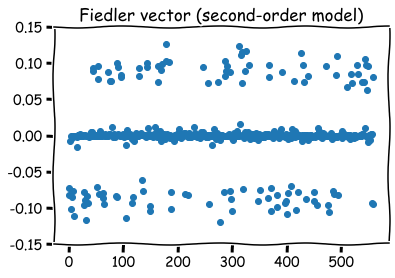

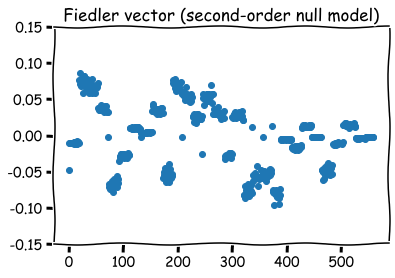

In [26]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np

plt.xkcd()

plt.ylim(-.15, .15)
plt.title('Fiedler vector (second-order model)')
plt.scatter(range(hon_2.ncount()), np.real(pp.algorithms.spectral.fiedler_vector_dense(hon_2)))
plt.show()

plt.title('Fiedler vector (second-order null model)')
plt.ylim(-.15, .15)
plt.scatter(range(hon_2.ncount()), np.real(pp.algorithms.spectral.fiedler_vector_dense(pp.HigherOrderNetwork(p, k=2, null_model=True))))
plt.show()

The three clusters in the temporal network clearly show up as three different value ranges in the distribution of entries in the Fiedler vector. The lack of this structure in the null model confirms, that the cluster structure is only due to the chronological ordering of links, and neither due to their topology nor due their frequencies.

### Bonus: Data-driven story-telling with custom visualisation templates

Finally, we briefly introduce custom visualisation templates, which you may find useful for data-driven and visual story-telling tasks. As an example, we will use a data set on character co-occurrences in the text of The Lord of the Rings. You can load it from the table `lotr` SQLite database. In this table, each row `source, target, time` captures that the characters `source` and `target` are mentioned within the same sentence, where `time` chronologically numbers sentences throughout all three novels.

In the following, we want to generate a nice interactive visualisation of this data set. For this, we will use the custom templating mechanism of `pathpy`. It allows you to define your own HTML templates, that you can derive from the default visualisation templates that we have used so far. This enables us to use the default `pathpy` visuals as a baseline, that we can tune to our needs. 

Technically, such a template is nothing more than an HTML5 file with embedded JavaScript and CSS code. `pathpy` will use this template, and replace placeholder variables that we can set via the `style` parameter dictionary. We can tell `pathpy` to use an arbitrary custom template file by setting the entry `style['template'] = filename`. In this template, we can then use variables in the form `$variable`, which we can set from within `python` by setting `style['variable'] = value`.

In the custom template file `data/custom_template.html` we use all of `pathpy`'s default style parameters, as well as two additional parameters `chapter_data` and `character_classes`. We will use the first to pass chapter marks to the visualisation, which are then shown in the top left part of the visualisation as the story unfolds. Moreover, we will visualise the different factions (Hobits, Elves, Fellowship, Dwarves, ...) to which characters belong, so we need to pass those to the template as well.

You can read the character and chapter data from the corresponding json-files in the data directory. Just use the `json.load` function in `python's` json file to read them into two dictionaries and pass those two dictionaries to the corresponding `style` parameters.

<span style="color:red">**TODO:** Use the `pp.visualisations.export_html()` method to create a visualisation of dynamic character interactions in The Lord of The Rings based on the table `lotr` in the SQLite database and the custom template file `custom_template.html` in the `data` folder.</span>

In [27]:
import json

t_lotr = pp.TemporalNetwork.from_sqlite(
    con.execute('SELECT source, target, time FROM lotr'))
print(t)

# Load chapter marks from JSON file
with open('../data/lotr_chapters.json', 'r') as f:
    chapters = json.load(f)

# Load character classes from JSON file
with open('../data/lotr_characters.json', 'r') as f:
    characters = json.load(f)

style = {
    # some default parameters
    'width': 1200,
    'height': 1000,
    'look_ahead': 500,
    'look_behind': 1500,
    'ts_per_frame': 20, 
    'ms_per_frame': 50,
    'inactive_edge_width': 4.0,
    'active_edge_width': 6.0,
    'label_offset': [0,-16],    
    'node_size': 10,
    'label_size': '14px',
    
     # tell pathpy to use a user-provided custom template
    'template': '../data/custom_template.html',
    
    # add custom parameters defined in our custom template
    'chapter_data': chapters, 
    'character_classes': characters,    
}

# generate HTML based on our custom template
pp.visualisation.export_html(t_lotr, filename='../visualisations/4_demo_lotr.html', **style)

Nodes:			30
Time-stamped links:	60000
Links/Nodes:		2000.0
Observation period:	[0, 59999]
Observation length:	 59999 
Time stamps:		 60000 
Avg. inter-event dt:	 1.0
Min/Max inter-event dt:	 1/1


As a little distraction at the end of this session, open the generated file in your browser, lean back and enjoy watching the story unfold - as a temporal network :-)